# Shortest path

In [ ]:
include("moving.jl")
include("_types.jl")
include("_util.jl")
import Plots

In [ ]:
p1 = Polygon([0,0],[1,0],[1,1],[0,1])
p2 = Polygon([2,2],[3,2],[3,3],[2,3])
origin = Vertex([0,4])
dest = Vertex([4,2])
visg = get_visibility_graph(origin,dest,[p1,p2])

In [ ]:
plot(visg,color=:deepskyblue2)
plot!(p1,color=:darkslategrey)
plot!(p2,color=:darkslategrey)
plot!(origin,color=:red)
plot!(dest,color=:red)

In [ ]:
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot(visg,color=:deepskyblue2)
plot!(p1,color=:darkslategrey)
plot!(p2,color=:darkslategrey)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:red)
plot!(dest,color=:red)

# Moving Polygon

In [1]:
include("moving.jl")
include("_types.jl")
include("_util.jl")
import Plots

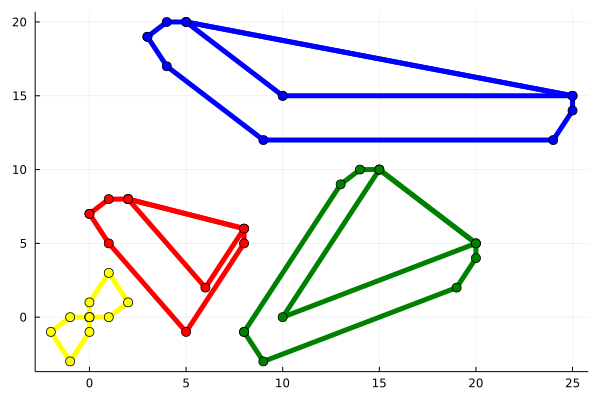

In [6]:
p0 = Polygon([0,0],[1,0],[2,1],[1,3],[0,1])
p1 = Polygon(-[0,0],-[1,0],-[2,1],-[1,3],-[0,1])

obs1 = Polygon([2,8],[6,2],[8,6])
obs2 = Polygon([15,10],[10,0],[20,5])
obs3 = Polygon([10,15],[25,15],[5,20])

origin = Vertex([0,0])
dest = Vertex([25,8])

obs = [obs1,obs2,obs3]
obs_hulls = [minkowski_sum(o,p1) for o in obs]
colors = [:red,:green,:blue]

plot(p1,color=:yellow)
for (o,h,c) in zip(obs,obs_hulls,colors)
    plot!(o,color=c)
    plot!(h,color=c)
end
plot!(p0,color=:yellow)

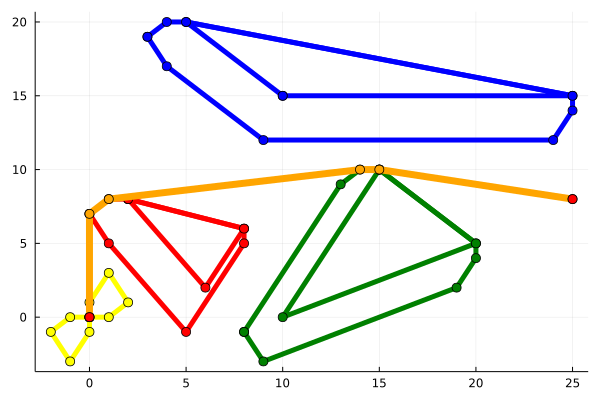

In [7]:
visg = get_visibility_graph(origin,dest,obs_hulls)
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot(p1,color=:yellow)
for (o,h,c) in zip(obs,obs_hulls,colors)
    plot!(o,color=c)
    plot!(h,color=c)
end
plot!(p0,color=:yellow)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:blue)
plot!(dest,color=:red)